# Example 1: The Necessity Gap for Minkowski Sums

In this example, we look for an instance of the following problem. We are given two H-polytopes $\mathbb{A}, \mathbb{B}$. We manually find the H-polytope form of $C:=A \oplus B$. Then we check $ \mathbb{C} \subseteq \mathbb{A} \oplus \mathbb{B} \subseteq \mathbb{C}$ using containment arguments. 
Let $\mathbb{A}$ be a triangle.

In [1]:
import numpy as np
import pypolycontain as pp

H=np.array([[1,1],[-1,1],[0,-1]])
h=np.array([[1,1,0]]).reshape(3,1)
A=pp.H_polytope(H,h)

pp.visualize([A],title=r'$\mathbb{A}$')

And let $B$ be a tiny rectangle at the bottom of $A$ as follows.

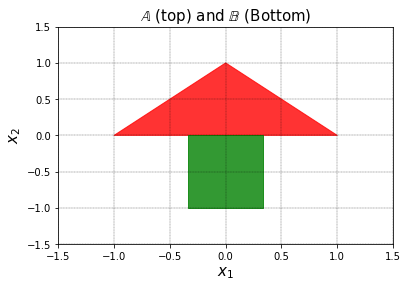

In [2]:
e=1/3
H=np.array([[1,0],[-1,0],[0,-1],[0,1]])
h=np.array([[e,e,1,0]]).reshape(4,1)
B=pp.H_polytope(H,h,color='green')
pp.visualize([A,B],title=r'$\mathbb{A}$ (top) and $\mathbb{B}$ (Bottom)')

The H-polytope form of the Minkowski sum $\mathbb{A} \oplus \mathbb{B}$ can be easily found. We call this H-polytope $C_H$.

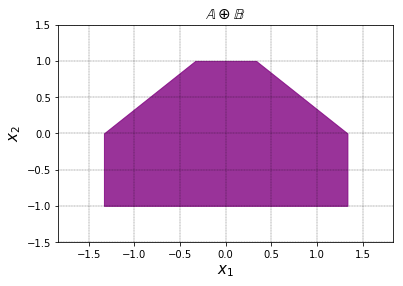

In [3]:
H=np.array([[1,0],[-1,0],[0,-1],[1,1],[-1,1],[0,1]])
h=np.array([[1+e,1+e,1,1+e,1+e,1]]).reshape(6,1)
p_sum=pp.H_polytope(H,h,color='purple')
pp.visualize([p_sum],title=r"$\mathbb{A} \oplus \mathbb{B}$")

We can also call the AH-polytope form of $A\oplus B$.

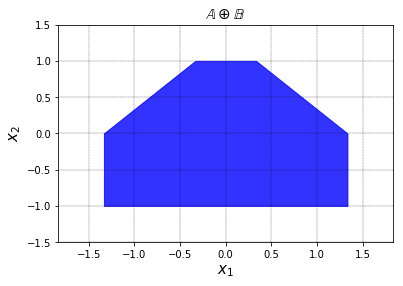

In [4]:
C=pp.minkowski_sum(A,B)
pp.visualize([C],title=r"$\mathbb{A} \oplus \mathbb{B}$")

Now we run the following experiment. We find the largest
$$
\begin{array}{lll}
\alpha^*_N = &  \max. & \alpha \\
& \text{subject to} & \alpha C \subseteq_N (A \oplus B)
\end{array}
$$
where for $N=-1$ the condition is necessary and sufficient and for $N=0$ it is only sufficient. 

What we expect is that for necessary and sufficient condition, we obtain the largest possible $\alpha^*$, which is 1. However, as we drop necessity, we are going to observe conservatieness in the fact that $$\alpha_i\le 1, i \ge 0.$$  

### Maximzing of $\alpha$ with subset encoding: linear program

We import the ```mathematicalprogram``` module from ```pydrake```. As the optimization solver, we import Gurobi bindings of pydrake, but other solvers may also be used - there are often slower. 

In [5]:
import pydrake.solvers.mathematicalprogram as MP
# use Gurobi solver
import pydrake.solvers.gurobi as Gurobi_drake
gurobi_solver=Gurobi_drake.GurobiSolver()
Theta={}
for i in range(-1,3):
    prog=MP.MathematicalProgram()
    alpha=prog.NewContinuousVariables(1,"alpha")
    p_test_H=pp.objects.H_polytope(p_sum.H,p_sum.h)
    p_test=pp.objects.AH_polytope(T=np.eye(2)*alpha,t=np.zeros((2,1)),P=p_test_H)
    Theta[i],*_=pp.subset(prog,p_test,C,k=i)
    prog.AddLinearCost(-np.eye(1),np.zeros((1)),alpha)
    result=gurobi_solver.Solve(prog,None,None)
    if result.is_success():
        print("%d: subset test successfull"%i)
        print(r"$alpha^*$=",result.GetSolution(alpha), "Theta size=",Theta[i].shape)
    else:
        print("not a subset") 

-1: subset test successfull
$alpha^*$= [0.72727273] Theta size= (7, 7)
0: subset test successfull
$alpha^*$= [1.] Theta size= (7, 9)
1: subset test successfull
$alpha^*$= [0.74500227] Theta size= (7, 12)
2: subset test successfull
$alpha^*$= [0.72727273] Theta size= (7, 7)


In [7]:
8/11

0.7272727272727273

In [8]:
p_test.T

array([[<Expression "alpha(0)">, <Expression "0">],
       [<Expression "0">, <Expression "alpha(0)">]], dtype=object)